In [6]:
import os
import pandas as pd
import datetime
from tqdm import tqdm
from pandas.errors import EmptyDataError
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

#for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
#import lightgbm as lgb

# Subject-1 Scene-1 Session-1

In [7]:
file = r"E:\project 2\acc_watch_clip\subject1\scene1\session1"
os.listdir(file)

['carrying.csv',
 'checking_time.csv',
 'closing.csv',
 'crouching.csv',
 'entering.csv',
 'exiting.csv',
 'fall.csv',
 'jumping.csv',
 'kicking.csv',
 'loitering.csv',
 'looking_around.csv',
 'opening.csv',
 'picking_up.csv',
 'pointing.csv',
 'pulling.csv',
 'pushing.csv',
 'running.csv',
 'setting_down.csv',
 'standing.csv',
 'talking.csv',
 'talking_on_phone.csv',
 'throwing.csv',
 'transferring_object.csv',
 'using_phone.csv',
 'walking.csv',
 'waving_hand.csv']

In [8]:
carrying = pd.read_csv(r"E:\project 2\acc_watch_clip\subject1\scene1\session1\carrying.csv", header=None)
carrying.rename(columns = {0:'Datetime', 1:'X', 2:'Y', 3:'Z'}, inplace = True)
carrying.head() 

Datetime         X         Y         Z
0  20181016_13:37:28.609000  7.661818 -8.705089 -0.610170
1  20181016_13:37:28.619000  7.508678 -8.793623 -0.686740
2  20181016_13:37:28.631000  7.932207 -8.750552 -1.028914
3  20181016_13:37:28.640000  8.226524 -8.817552 -1.562513
4  20181016_13:37:28.648000  8.327023 -8.571091 -1.887937

In [9]:
carrying.dtypes

Datetime     object
X           float64
Y           float64
Z           float64
dtype: object

In [10]:
carrying["Datetime"] = carrying["Datetime"].apply(lambda x: x[:4] + "-" + x[4:6]+ "-" + x[6:8] + " " +x[9:])
carrying["Datetime"] = pd.to_datetime(carrying["Datetime"], format="%Y-%m-%d %H:%M:%S.%f")
carrying.head()

Datetime         X         Y         Z
0 2018-10-16 13:37:28.609  7.661818 -8.705089 -0.610170
1 2018-10-16 13:37:28.619  7.508678 -8.793623 -0.686740
2 2018-10-16 13:37:28.631  7.932207 -8.750552 -1.028914
3 2018-10-16 13:37:28.640  8.226524 -8.817552 -1.562513
4 2018-10-16 13:37:28.648  8.327023 -8.571091 -1.887937

In [11]:
carrying.dtypes

Datetime    datetime64[ns]
X                  float64
Y                  float64
Z                  float64
dtype: object

# all subjects + all scenes + all sessions

In [12]:
all_activities=[]
bad_files=[]

for i in tqdm(range(1,21)):
    
    subject = "subject" + str(i)
    subject_path = os.path.join(r"E:\project 2\acc_watch_clip", subject)
    len_subject = len(os.listdir(subject_path))
    #print(subject_path)
    #print(len_subject)


    for j in range(1, len_subject+1):

        scene = "scene"+str(j)
        scene_path = os.path.join(subject_path, scene)
        len_scene = len(os.listdir(scene_path))
        #print(scene_path)
        #print(len_scene)


        for k in range(1, len_scene+1):

            session = "session"+str(k)
            session_path = os.path.join(scene_path, session)
            session_activities = os.listdir(session_path)
            #print(session_path)


            for file in session_activities:

                activity_path = os.path.join(session_path, file)
                #print(activity_path)

                activity_name = file[:-4]
                all_activities.append(activity_name)
                file_name = subject + "_" + scene + "_" + session + "_" +file[:-4]
                
                try:
                    globals()[file_name] = pd.read_csv(activity_path, header=None)
                    globals()[file_name].rename(columns = {0:'Datetime', 1:'X', 2:'Y', 3:'Z'}, inplace = True)
                    globals()[file_name]["Datetime"] = globals()[file_name]["Datetime"].apply(lambda x: x[:4] + "-" + x[4:6]+ "-" + x[6:8] + " " +x[9:])
                    globals()[file_name]["Datetime"] = pd.to_datetime(globals()[file_name]["Datetime"], format="%Y-%m-%d %H:%M:%S.%f")
                    
                except EmptyDataError:
                    bad_files.append(activity_path)

    #print("\n\n")

all_activities = list(set(all_activities))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:40<00:00,  8.02s/it]


In [13]:
print("All Activities:")
print(len(all_activities))
print(all_activities,"\n\n\n")

print("Bad Files:")
print(len(bad_files))
for bad_file in bad_files:
    print(bad_file)

All Activities:
36
['entering', 'talking', 'walking', 'setting_down', 'using_pc', 'throwing', 'carrying_light', 'fall', 'pocket_out', 'waving_hand', 'carrying_heavy', 'transferring_object', 'drinking', 'jumping', 'kicking', 'picking_up', 'sitting_down', 'using_phone', 'talking_on_phone', 'sitting', 'closing', 'checking_time', 'pushing', 'standing', 'pulling', 'pocket_in', 'carrying', 'loitering', 'running', 'standing_up', 'looking_around', 'exiting', 'pointing', 'Carrying_light', 'crouching', 'opening'] 



Bad Files:
4
E:\project 2\acc_watch_clip\subject11\scene2\session1\jumping.csv
E:\project 2\acc_watch_clip\subject11\scene2\session1\throwing.csv
E:\project 2\acc_watch_clip\subject11\scene2\session1\using_phone.csv
E:\project 2\acc_watch_clip\subject13\scene1\session5\standing.csv


In [14]:
subject1_scene2_session2_standing.head()

Datetime          X         Y         Z
0 2018-10-16 17:12:36.261  11.267802 -3.230311  2.385644
1 2018-10-16 17:12:36.271  10.748559 -2.699104  2.132005
2 2018-10-16 17:12:36.281  10.071390 -2.390430  1.957329
3 2018-10-16 17:12:36.292   9.341579 -2.014757  2.041078
4 2018-10-16 17:12:36.299   8.740981 -1.703690  2.194218

# labeling all the activities - all subjects

In [15]:
l = ['talking', 'standing', 'jumping', 'carrying_light', 'fall', 'carrying', 'carrying_heavy', 'picking_up', 
 'looking_around', 'standing_up', 'kicking', 'checking_time', 'entering', 'sitting_down', 'using_phone', 
 'opening', 'sitting', 'setting_down', 'walking', 'pulling', 'talking_on_phone', 'pocket_in', 'crouching', 
 'exiting', 'transferring_object', 'using_pc', 'running', 'drinking', 'loitering', 'throwing', 'pushing', 
 'Carrying_light', 'waving_hand', 'closing', 'pocket_out', 'pointing','crouching', 'transferring_object', 
 'carrying_heavy', 'looking_around', 'running', 'opening', 'using_pc', 'picking_up', 'using_phone', 'kicking', 
 'fall', 'jumping', 'pulling', 'pointing', 'sitting_down', 'throwing', 'sitting', 'exiting', 'carrying_light', 
 'entering', 'pushing', 'drinking', 'pocket_in', 'standing', 'pocket_out', 'standing_up', 'closing', 'loitering',
 'Carrying_light', 'talking_on_phone', 'carrying', 'waving_hand', 'setting_down', 'talking', 'walking', 'checking_time',
 'pocket_out', 'drinking', 'setting_down', 'standing_up', 'picking_up', 'pushing', 'talking_on_phone', 'entering', 
 'crouching', 'pointing', 'sitting', 'fall', 'carrying_heavy', 'using_phone', 'carrying', 'closing', 'carrying_light', 
 'opening', 'walking', 'talking', 'exiting', 'pocket_in', 'Carrying_light', 'running', 'throwing', 'transferring_object',
 'loitering', 'kicking', 'pulling', 'checking_time', 'standing', 'jumping', 'looking_around', 'using_pc', 'sitting_down', 
 'waving_hand','transferring_object', 'loitering', 'sitting', 'standing', 'opening', 'using_pc', 'pocket_out', 'talking', 
 'looking_around', 'closing', 'entering', 'kicking', 'waving_hand', 'throwing', 'standing_up', 'pointing', 'crouching', 
 'using_phone', 'carrying_light', 'sitting_down', 'fall', 'Carrying_light', 'walking', 'running', 'setting_down', 'pushing', 
 'drinking', 'carrying_heavy', 'carrying', 'picking_up', 'talking_on_phone', 'pocket_in', 'pulling', 'checking_time', 
 'jumping', 'exiting'
]
 
l = list(set(l))

print(len(l))
print(l)

36
['entering', 'talking', 'walking', 'setting_down', 'using_pc', 'throwing', 'carrying_light', 'fall', 'pocket_out', 'waving_hand', 'carrying_heavy', 'transferring_object', 'drinking', 'jumping', 'picking_up', 'kicking', 'sitting_down', 'using_phone', 'talking_on_phone', 'sitting', 'closing', 'checking_time', 'pushing', 'standing', 'pulling', 'pocket_in', 'carrying', 'loitering', 'running', 'standing_up', 'looking_around', 'exiting', 'pointing', 'Carrying_light', 'crouching', 'opening']


In [16]:
activities = {'talking':0, 'standing':1, 'carrying_light':2, 'Carrying_light':2, 'fall':3, 'carrying_heavy':4, 'carrying':5, 'picking_up':6, 
              'standing_up':7, 'looking_around':8, 'kicking':9, 'checking_time':10, 'entering':11, 'sitting_down':12, 
              'using_phone':13, 'pointing':14, 'opening':15, 'sitting':16, 'setting_down':17, 'walking':18, 'pulling':19, 
              'talking_on_phone':20, 'pocket_in':21, 'crouching':22, 'exiting':23, 'transferring_object':24, 'using_pc':25, 
              'running':26, 'drinking':27, 'loitering':28, 'throwing':29, 'pushing':30, 'waving_hand':31, 'closing':32, 
              'pocket_out':33, 'jumping':34}

# All Subjects - Datetime conversion + Activities labeling - main 

In [17]:
all_activities=[]
bad_files=[]

for i in tqdm(range(1,21)):
    
    subject = "subject" + str(i)
    subject_path = os.path.join(r"E:\project 2\acc_watch_clip", subject)
    len_subject = len(os.listdir(subject_path))
    #print(subject_path)
    #print(len_subject)


    for j in range(1, len_subject+1):

        scene = "scene"+str(j)
        scene_path = os.path.join(subject_path, scene)
        len_scene = len(os.listdir(scene_path))
        #print(scene_path)
        #print(len_scene)


        for k in range(1, len_scene+1):

            session = "session"+str(k)
            session_path = os.path.join(scene_path, session)
            session_activities = os.listdir(session_path)
            #print(session_path)


            for file in session_activities:

                activity_path = os.path.join(session_path, file)
                #print(activity_path)

                activity_name = file[:-4]
                all_activities.append(activity_name)
                file_name = subject + "_" + scene + "_" + session + "_" +file[:-4]
                
                try:
                    globals()[file_name] = pd.read_csv(activity_path, header=None)
                    globals()[file_name].rename(columns = {0:'Datetime', 1:'X', 2:'Y', 3:'Z'}, inplace = True)
                    globals()[file_name]["Datetime"] = globals()[file_name]["Datetime"].apply(lambda x: x[:4] + "-" + x[4:6]+ "-" + x[6:8] + " " +x[9:])
                    globals()[file_name]["Datetime"] = pd.to_datetime(globals()[file_name]["Datetime"], format="%Y-%m-%d %H:%M:%S.%f")
                    globals()[file_name]["Activity"] = activities[activity_name]
                    
                    #globals()[file_name]["Year"] = globals()[file_name]["Datetime"].dt.year
                    #globals()[file_name]["Month"] = globals()[file_name]["Datetime"].dt.month
                    #globals()[file_name]["Date"] = globals()[file_name]["Datetime"].dt.day
                    
                    globals()[file_name]["Subject_Number"] = i
                    globals()[file_name]["Scene_Number"] = j
                    globals()[file_name]["Session_Number"] = k
                
                    
                except EmptyDataError:
                    bad_files.append(activity_path)

    #print("\n\n")

all_activities = list(set(all_activities))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.57s/it]


In [ ]:
subject1_scene2_session2_standing.head()

In [ ]:
subject1_scene1_session5_walking.head()

# Merging all activities - Subject1 - don't run

In [99]:
subject = "subject1"
subject_path = os.path.join(r"E:\project 2\acc_watch_clip", subject)
len_subject = len(os.listdir(subject_path))

for j in range(1, len_subject+1):

    scene = "scene"+str(j)
    scene_path = os.path.join(subject_path, scene)
    len_scene = len(os.listdir(scene_path))
    #print(scene_path)
    #print(len_scene)


    for k in range(1, len_scene+1):

        session = "session"+str(k)
        session_path = os.path.join(scene_path, session)
        session_activities = os.listdir(session_path)
        #print(session_path)


        for file in session_activities:

            activity_path = os.path.join(session_path, file)
            #print(activity_path)

            activity_name = file[:-4]
            all_activities.append(activity_name)
            file_name = subject + "_" + scene + "_" + session + "_" +file[:-4]
                
            try:
                print(file_name)
                print(len(globals()[file_name]))
                print(globals()[file_name]["Datetime"].min())
                print(globals()[file_name]["Datetime"].max())
            
                print("\n")
                    
            except EmptyDataError:
                bad_files.append(activity_path)


subject1_scene1_session1_carrying
896
2018-10-16 13:37:28.609000
2018-10-16 13:37:37.530000


subject1_scene1_session1_checking_time
555
2018-10-16 13:34:33.210000
2018-10-16 13:34:38.753000


subject1_scene1_session1_closing
763
2018-10-16 13:37:11.610000
2018-10-16 13:37:19.210000


subject1_scene1_session1_crouching
498
2018-10-16 13:33:55.358000
2018-10-16 13:34:00.312000


subject1_scene1_session1_entering
728
2018-10-16 13:36:13.517000
2018-10-16 13:36:20.765000


subject1_scene1_session1_exiting
742
2018-10-16 13:36:02.648000
2018-10-16 13:36:10.037000


subject1_scene1_session1_fall
383
2018-10-16 13:39:25.058000
2018-10-16 13:39:28.867000


subject1_scene1_session1_jumping
347
2018-10-16 13:35:50.207000
2018-10-16 13:35:53.656000


subject1_scene1_session1_kicking
336
2018-10-16 13:35:23.757000
2018-10-16 13:35:27.095000


subject1_scene1_session1_loitering
579
2018-10-16 13:37:48.622000
2018-10-16 13:37:54.414000


subject1_scene1_session1_looking_around
805
2018-10-16 13:38:

In [100]:
subject1_scene1_session1_carrying.head()

Datetime         X         Y         Z
0 2018-10-16 13:37:28.609  7.661818 -8.705089 -0.610170
1 2018-10-16 13:37:28.619  7.508678 -8.793623 -0.686740
2 2018-10-16 13:37:28.631  7.932207 -8.750552 -1.028914
3 2018-10-16 13:37:28.640  8.226524 -8.817552 -1.562513
4 2018-10-16 13:37:28.648  8.327023 -8.571091 -1.887937

In [101]:
subject1_scene1_session1_carrying.tail()

Datetime         X         Y         Z
891 2018-10-16 13:37:37.492  6.994221 -6.293124  3.838088
892 2018-10-16 13:37:37.500  7.070791 -5.989235  3.766303
893 2018-10-16 13:37:37.510  6.989435 -5.977271  3.637090
894 2018-10-16 13:37:37.520  6.872187 -6.223732  3.498307
895 2018-10-16 13:37:37.530  6.726224 -6.508478  3.366701

# all subjects - don't run


In [108]:
SUBJECT = []
bad_files=[]
key_error = []
total_length=0

for i in tqdm(range(1,21)):

    subject = "subject"+str(i)
    subject_path = os.path.join(r"E:\project 2\acc_watch_clip", subject)
    len_subject = len(os.listdir(subject_path))

    for j in range(1, len_subject+1):

        scene = "scene"+str(j)
        scene_path = os.path.join(subject_path, scene)
        len_scene = len(os.listdir(scene_path))
        
        #print(scene_path)
        #print(len_scene)


        for k in range(1, len_scene+1):

            session = "session"+str(k)
            session_path = os.path.join(scene_path, session)
            session_activities = os.listdir(session_path)
            
            #print(session_path)


            for file in session_activities:

                activity_path = os.path.join(session_path, file)
                
                #print(activity_path)

                activity_name = file[:-4]
                all_activities.append(activity_name)
                file_name = subject + "_" + scene + "_" + session + "_" +file[:-4]

                try:
                    #print(file_name)
                    total_length+=len(globals()[file_name])
                    SUBJECT.append(globals()[file_name])

                    #print("\n")

                except EmptyDataError:
                    bad_files.append(activity_path)
                
                except KeyError :
                    key_error.append(activity_path)
                    
                    

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 278.38it/s]


In [113]:
bad_files

[]

In [114]:
key_error

['E:\\project 2\\acc_watch_clip\\subject11\\scene2\\session1\\jumping.csv',
 'E:\\project 2\\acc_watch_clip\\subject11\\scene2\\session1\\throwing.csv',
 'E:\\project 2\\acc_watch_clip\\subject11\\scene2\\session1\\using_phone.csv',
 'E:\\project 2\\acc_watch_clip\\subject13\\scene1\\session5\\standing.csv']

In [115]:
SUBJECT

[                   Datetime         X         Y         Z
 0   2018-10-16 13:37:28.609  7.661818 -8.705089 -0.610170
 1   2018-10-16 13:37:28.619  7.508678 -8.793623 -0.686740
 2   2018-10-16 13:37:28.631  7.932207 -8.750552 -1.028914
 3   2018-10-16 13:37:28.640  8.226524 -8.817552 -1.562513
 4   2018-10-16 13:37:28.648  8.327023 -8.571091 -1.887937
 ..                      ...       ...       ...       ...
 891 2018-10-16 13:37:37.492  6.994221 -6.293124  3.838088
 892 2018-10-16 13:37:37.500  7.070791 -5.989235  3.766303
 893 2018-10-16 13:37:37.510  6.989435 -5.977271  3.637090
 894 2018-10-16 13:37:37.520  6.872187 -6.223732  3.498307
 895 2018-10-16 13:37:37.530  6.726224 -6.508478  3.366701
 
 [896 rows x 4 columns],
                    Datetime         X         Y         Z
 0   2018-10-16 13:34:33.228  4.517649 -2.400001  6.489335
 1   2018-10-16 13:34:33.239  4.438686 -2.311467  6.508478
 2   2018-10-16 13:34:33.247  4.280760 -1.998007  6.463014
 3   2018-10-16 13:34:33.256 

In [37]:
#SUBJECT1 = pd.concat(SUBJECT1, axis=0)
#SUBJECT1

In [116]:
print(total_length)
print(len(SUBJECT))

6233366
8732


In [39]:
#SUBJECT1.to_csv("SUBJECT1.csv", index= None)
#print(SUBJECT1.shape)

In [118]:
SUBJECT_lens = []

for i in range(len(SUBJECT)):
    SUBJECT_lens.append(len(SUBJECT[i]))

print(SUBJECT_lens)

[896, 555, 763, 498, 728, 742, 383, 347, 336, 579, 805, 848, 408, 272, 1212, 1267, 573, 477, 473, 821, 675, 350, 513, 687, 842, 527, 1110, 408, 713, 421, 777, 834, 446, 357, 336, 659, 694, 812, 370, 405, 1066, 1285, 668, 741, 400, 773, 693, 403, 438, 680, 487, 524, 849, 385, 669, 456, 758, 789, 414, 332, 333, 754, 746, 690, 432, 363, 1129, 1211, 544, 523, 431, 650, 726, 421, 437, 703, 558, 492, 940, 444, 845, 416, 827, 757, 414, 366, 357, 761, 638, 882, 635, 403, 1247, 1175, 614, 521, 508, 673, 610, 323, 582, 758, 427, 464, 967, 495, 777, 470, 736, 754, 430, 393, 327, 792, 695, 790, 537, 357, 965, 1229, 609, 608, 394, 813, 822, 367, 473, 815, 424, 505, 955, 427, 684, 486, 701, 708, 412, 329, 392, 722, 786, 794, 642, 439, 1254, 1193, 705, 541, 397, 665, 803, 430, 452, 769, 671, 566, 1059, 568, 745, 470, 700, 743, 392, 331, 319, 794, 786, 837, 562, 401, 1471, 1330, 786, 455, 460, 805, 827, 360, 413, 756, 792, 580, 1248, 577, 687, 557, 598, 869, 488, 406, 355, 1139, 790, 879, 686, 460, 16

# ML models

In [119]:
features = []

class feature_extraction:
    
    def __init__(self,dataframe,window_len,overlap,up):
        self.dataframe = dataframe
        self.window_len=window_len
        self.overlap=overlap
        self.up=up

    def load_data(self):
        #df = pd.read_csv(self.path,low_memory=False)
        df = self.dataframe
        #print(df.head())
        #print(df.shape[0])
        return df


    def process_label(self,df):
    
        label = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Processing The Label File   '):
            x = df.loc[d:(d + self.window_len), 'Activity'].to_numpy()
            d = d + delta
            temp = np.array([sp.stats.mode(x)[0]])
            if t == 0:
                label = temp
            else:
                label = np.concatenate([label, temp])
        return label

    def get_statistical_features(self, df, axis="X"):
    
        features = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - (int(np.floor(self.window_len /delta)) - 1)
        
        for t in tqdm(range(num_window), desc='Calculating ' + axis +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), axis].to_numpy()
            d = d + delta
            mini = np.min(x)
            maxi = np.max(x)
            std = np.std(x)
            avg = np.mean(x)
            var = np.var(x)
            ptp = np.ptp(x)
            mrc = np.max(np.diff(x))
            arc = np.mean(np.diff(x))
            src = np.std(np.diff(x))
            mad = sp.stats.median_absolute_deviation(x)
            iqr = sp.stats.iqr(x)
            cor = np.correlate(x, x)[0]
            rms = np.sum(np.square(x)) / x.shape[0]
            vel = np.trapz(x) / x.shape[0]
            
            temp = np.array([[mini, maxi, std, avg, var, ptp, mrc, arc,src, mad, iqr, cor, rms, vel]])
            
            if t == 0:
                features = temp
            else:
                features = np.concatenate([features, temp])
        return features


    def get_time(self, df):
        features = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Calculating ' + 'Epoch time[ms]' +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), 'Epoch time[ms]'].to_numpy()
            d = d + delta
            min = np.min(x)
            max = np.max(x)
            std = np.std(x)
            avg = np.mean(x)
            var = np.var(x)
            temp = np.array([[min, max, std, avg, var]])
            if t == 0:
                features = temp
            else:
                features = np.concatenate([features, temp])
        return features


    def extract(self, labelled=True):
        df = self.load_data()
        #stat_time=self.get_time(df)
        stat_X = self.get_statistical_features(df, axis='X')
        stat_Y = self.get_statistical_features(df, axis='Y')
        stat_Z = self.get_statistical_features(df, axis='Z')

        if labelled:
            label = self.process_label(df)
            features.append(np.concatenate([stat_X, stat_Y, stat_Z, label], axis=1))
        else:
            features.append(np.concatenate([stat_X, stat_Y, stat_Z], axis=1))     
        return features

In [120]:
for i in range(len(SUBJECT)):
    dataframe = SUBJECT[i]
    fe = feature_extraction(dataframe, window_len=30, overlap=0, up=0)
    features = fe.extract()
    

Processing The Label File   :   0%|                                                             | 0/29 [00:00<?, ?it/s]


KeyError: 'Activity'

In [74]:
features

[array([[ 3.4049866 ,  8.597412  ,  1.95500095, ...,  2.01673187,
         -1.28637374,  5.        ],
        [ 3.9218364 ,  7.9034934 ,  1.30514849, ...,  0.70642713,
          0.30604973,  5.        ],
        [ 4.658826  ,  6.7908306 ,  0.63251885, ...,  4.9155161 ,
          2.12880169,  5.        ],
        ...,
        [ 5.5633125 ,  9.616755  ,  1.40815653, ..., 10.70972938,
          3.10021047,  5.        ],
        [ 6.649654  ,  8.068598  ,  0.41832409, ..., 11.66582714,
          3.15601728,  5.        ],
        [ 5.029713  ,  8.784052  ,  1.08984711, ...,  7.44488444,
          2.61481485,  5.        ]]),
 array([[-3.34995180e-01,  4.51764900e+00,  1.63055073e+00,
          1.44233175e+00,  2.65869570e+00,  4.85264418e+00,
          7.17846700e-02, -1.56331074e-01,  1.51090955e-01,
          1.74187096e+00,  2.53639207e+00,  1.46909514e+02,
          4.73901658e+00,  1.37224521e+00, -2.40000100e+00,
          3.04606320e+00,  1.66305386e+00,  6.98549832e-01,
          2.7

In [75]:
for i in range(len(features)):
    features[i]= pd.DataFrame(features[i])

In [76]:
features

[          0          1         2         3         4         5         6   \
 0   3.404987   8.597412  1.955001  6.034390  3.822029  5.192425  0.478565   
 1   3.921836   7.903493  1.305148  6.301537  1.703413  3.981657  0.418744   
 2   4.658826   6.790831  0.632519  5.519702  0.400080  2.132005  0.401994   
 3   6.063413   7.271788  0.350535  6.698823  0.122875  1.208375  0.236889   
 4   4.950750   7.018149  0.456722  6.197565  0.208595  2.067399  0.416351   
 5   6.089734   7.183254  0.365547  6.689792  0.133624  1.093520  0.217747   
 6   5.730810   6.750153  0.258439  6.181124  0.066791  1.019343  0.258425   
 7   6.137590   9.190832  0.923788  7.486988  0.853384  3.053242  0.521635   
 8   7.238288   8.901300  0.438214  7.898090  0.192032  1.663012  0.232104   
 9   6.819544   8.901300  0.652998  7.676252  0.426407  2.081756  0.131605   
 10  5.187640   8.047063  0.811490  6.688094  0.658516  2.859423  0.421137   
 11  5.331209   6.333802  0.251797  5.862647  0.063402  1.002593

In [77]:
features = pd.concat(features, axis=0)
features

0         1         2         3         4         5         6   \
0   3.404987  8.597412  1.955001  6.034390  3.822029  5.192425  0.478565   
1   3.921836  7.903493  1.305148  6.301537  1.703413  3.981657  0.418744   
2   4.658826  6.790831  0.632519  5.519702  0.400080  2.132005  0.401994   
3   6.063413  7.271788  0.350535  6.698823  0.122875  1.208375  0.236889   
4   4.950750  7.018149  0.456722  6.197565  0.208595  2.067399  0.416351   
..       ...       ...       ...       ...       ...       ...       ...   
11  8.982656  9.104691  0.029083  9.046722  0.000846  0.122035  0.043071   
12  9.011370  9.236296  0.058674  9.093730  0.003443  0.224926  0.040678   
13  9.004191  9.528220  0.133613  9.260378  0.017852  0.524029  0.107677   
14  9.080762  9.772287  0.216243  9.412438  0.046761  0.691525  0.129212   
15  9.111869  9.485149  0.090585  9.335636  0.008206  0.373280  0.050250   

          7         8         9   ...        33        34        35        36  \
0  -0.124666  0.345487  3.029649  ...  2.050649  0.433101 -0.017149  0.271958   
1   0.089412  0.196497  1.560944  ...  2.943172  0.442672  0.098106  0.186124   
2   0.006221  0.207077  0.784019  ...  1.375873  0.375673 -0.010130  0.228413   
3  -0.014277  0.104616  0.436355  ...  1.201197  0.404387  0.032622  0.179364   
4  -0.006939  0.248419  0.191570  ...  1.849652  0.524028 -0.011645  0.305142   
..       ...       ...       ...  ...       ...       ...       ...       ...   
11 -0.000479  0.024893  0.035476  ...  0.119641  0.033500 -0.003749  0.015155   
12  0.005902  0.023564  0.042573  ...  0.105284  0.035892 -0.000718  0.019323   
13 -0.000399  0.056510  0.092238  ...  0.842274  0.045464 -0.025922  0.054126   
14  0.004307  0.055289  0.283808  ...  0.784846  0.145962  0.023769  0.048411   
15 -0.007498  0.025576  0.046118  ...  0.504886  0.081356 -0.004706  0.043276   

          37        38          39        40        41    42  
0   0.670496  0.738186   62.518688  2.016732 -1.286374   5.0  
1   0.904638  1.330409   21.899241  0.706427  0.306050   5.0  
2   0.507306  0.728614  152.380999  4.915516  2.128802   5.0  
3   0.340570  0.494118  114.485358  3.693076  1.828927   5.0  
4   0.539235  0.729811  139.172749  4.489444  1.982106   5.0  
..       ...       ...         ...       ...       ...   ...  
11  0.035476  0.047856    5.910531  0.190662  0.421098  31.0  
12  0.021286  0.025125    4.126898  0.133126  0.351861  31.0  
13  0.205761  0.473779    2.758153  0.088973  0.031686  31.0  
14  0.301546  0.508475    2.061428  0.066498 -0.018525  31.0  
15  0.106428  0.248854    0.850641  0.027440 -0.031222  31.0  

[9299 rows x 43 columns]

In [56]:
#path = 'SUBJECT1.csv'
#fe = feature_extraction(path, window_len=30, overlap=0, up=0)
#features = fe.extract()

In [78]:
df= pd.DataFrame(features)
column_names='X_min X_max X_std X_avg X_var X_ptp X_mrc X_arc X_src X_mad X_iqr X_cor X_rms X_vel \
              Y_min Y_max Y_std Y_avg Y_var Y_ptp Y_mrc Y_arc Y_src Y_mad Y_iqr Y_cor Y_rms Y_vel \
              Z_min Z_max Z_std Z_avg Z_var Z_ptp Z_mrc Z_arc Z_src Z_mad Z_iqr Z_cor Z_rms Z_vel \
              label'

df.columns = column_names.split()
fill_mean = lambda col : col.fillna(col.mean())
df = df.apply(fill_mean, axis = 0)
df.head()

X_min     X_max     X_std     X_avg     X_var     X_ptp     X_mrc  \
0  3.404987  8.597412  1.955001  6.034390  3.822029  5.192425  0.478565   
1  3.921836  7.903493  1.305148  6.301537  1.703413  3.981657  0.418744   
2  4.658826  6.790831  0.632519  5.519702  0.400080  2.132005  0.401994   
3  6.063413  7.271788  0.350535  6.698823  0.122875  1.208375  0.236889   
4  4.950750  7.018149  0.456722  6.197565  0.208595  2.067399  0.416351   

      X_arc     X_src     X_mad  ...     Z_ptp     Z_mrc     Z_arc     Z_src  \
0 -0.124666  0.345487  3.029649  ...  2.050649  0.433101 -0.017149  0.271958   
1  0.089412  0.196497  1.560944  ...  2.943172  0.442672  0.098106  0.186124   
2  0.006221  0.207077  0.784019  ...  1.375873  0.375673 -0.010130  0.228413   
3 -0.014277  0.104616  0.436355  ...  1.201197  0.404387  0.032622  0.179364   
4 -0.006939  0.248419  0.191570  ...  1.849652  0.524028 -0.011645  0.305142   

      Z_mad     Z_iqr       Z_cor     Z_rms     Z_vel  label  
0  0.670496  0.738186   62.518688  2.016732 -1.286374    5.0  
1  0.904638  1.330409   21.899241  0.706427  0.306050    5.0  
2  0.507306  0.728614  152.380999  4.915516  2.128802    5.0  
3  0.340570  0.494118  114.485358  3.693076  1.828927    5.0  
4  0.539235  0.729811  139.172749  4.489444  1.982106    5.0  

[5 rows x 43 columns]

In [79]:
df.tail()

X_min     X_max     X_std     X_avg     X_var     X_ptp     X_mrc  \
11  8.982656  9.104691  0.029083  9.046722  0.000846  0.122035  0.043071   
12  9.011370  9.236296  0.058674  9.093730  0.003443  0.224926  0.040678   
13  9.004191  9.528220  0.133613  9.260378  0.017852  0.524029  0.107677   
14  9.080762  9.772287  0.216243  9.412438  0.046761  0.691525  0.129212   
15  9.111869  9.485149  0.090585  9.335636  0.008206  0.373280  0.050250   

       X_arc     X_src     X_mad  ...     Z_ptp     Z_mrc     Z_arc     Z_src  \
11 -0.000479  0.024893  0.035476  ...  0.119641  0.033500 -0.003749  0.015155   
12  0.005902  0.023564  0.042573  ...  0.105284  0.035892 -0.000718  0.019323   
13 -0.000399  0.056510  0.092238  ...  0.842274  0.045464 -0.025922  0.054126   
14  0.004307  0.055289  0.283808  ...  0.784846  0.145962  0.023769  0.048411   
15 -0.007498  0.025576  0.046118  ...  0.504886  0.081356 -0.004706  0.043276   

       Z_mad     Z_iqr     Z_cor     Z_rms     Z_vel  label  
11  0.035476  0.047856  5.910531  0.190662  0.421098   31.0  
12  0.021286  0.025125  4.126898  0.133126  0.351861   31.0  
13  0.205761  0.473779  2.758153  0.088973  0.031686   31.0  
14  0.301546  0.508475  2.061428  0.066498 -0.018525   31.0  
15  0.106428  0.248854  0.850641  0.027440 -0.031222   31.0  

[5 rows x 43 columns]

In [88]:
df["label"].value_counts()

30.0    655
19.0    538
20.0    534
13.0    515
5.0     496
15.0    408
23.0    384
0.0     381
28.0    375
32.0    355
11.0    353
8.0     343
26.0    339
18.0    289
24.0    272
17.0    258
31.0    256
10.0    233
22.0    231
6.0     215
1.0     214
3.0     198
29.0    194
14.0    182
34.0    176
9.0     161
25.0    157
27.0    125
21.0    109
33.0    108
16.0    108
12.0     73
7.0      64
Name: label, dtype: int64

In [80]:
print(len(df))

split_size = int(len(df)*.7)
print(split_size)

df_train = df[:split_size]
print(len(df_train))

print(len(df)-len(df_train))
df_val = df[split_size:]
print(len(df_val))

9299
6509
6509
2790
2790


In [81]:
print(sorted(df["label"].unique()),"\n")

print(sorted(df_train["label"].unique()),"\n")

print(sorted(df_val["label"].unique()))

[0.0, 1.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0] 

[0.0, 1.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0] 

[0.0, 1.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 32.0, 34.0]


In [82]:
X_train=df_train.iloc[:,:-1].values
y_train=df_train.loc[:,'label'].values
X_val=df_val.iloc[:,:-1].values
y_val=df_val.loc[:,'label'].values

In [83]:


def feature_importance(model):
    importance = model.feature_importances_
    # plot feature importance
    plt.figure(figsize=(8, 6), dpi=80)
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

In [84]:
# confusion matrix drawing
def draw_confusion_matrix(cf_matrix):
    sns.set(rc = {'figure.figsize':(3,2)})
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

    ax.set_title('Confusion Matrix');
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [85]:
def auc_score(y,pred):
  fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
  print("AUC_SCORE: ",metrics.auc(fpr, tpr))


def classification(X_train, y_train, X_val, y_val,classifier):
    

    classifier = classifier
    classifier.fit(X_train, y_train)
    train_prediction = classifier.predict(X_train)
    test_prediction = classifier.predict(X_val)
    
    
    #print("Logloss for Train: ", sklearn.metrics.log_loss(y_train, train_prediction))
    #print("ROC_AUC Score for Train: ",roc_auc_score(y_train, classifier.predict_proba(X_train)[:, 1]))
    #auc_score(y_train,train_prediction)
    #print('Classification Report - Train: ', "\n", metrics.classification_report(y_train, train_prediction))
    #draw_confusion_matrix(metrics.confusion_matrix(y_train, train_prediction))
    
    
    #print("Logloss for Validation: ", sklearn.metrics.log_loss(y_val, test_prediction))
    #print("ROC_AUC Score for Validation: ",roc_auc_score(y_val, classifier.predict_proba(X_val)[:, 1]))
    #auc_score(y_val,test_prediction)
    print('Classification Report - Validation: ', "\n", metrics.classification_report(y_val, test_prediction))
    #draw_confusion_matrix(metrics.confusion_matrix(y_val, test_prediction))

    feature_importance(classifier)

Classification Report - Validation:  
               precision    recall  f1-score   support

         0.0       0.04      0.05      0.04       132
         1.0       0.00      0.01      0.01        73
         3.0       0.00      0.00      0.00        59
         5.0       0.06      0.05      0.05       162
         6.0       0.01      0.02      0.02        41
         7.0       0.40      0.29      0.33        14
         8.0       0.09      0.12      0.10       108
         9.0       0.00      0.00      0.00        49
        10.0       0.00      0.00      0.00        77
        11.0       0.02      0.01      0.01       120
        12.0       0.39      0.58      0.47        12
        13.0       0.27      0.19      0.22       147
        14.0       0.00      0.00      0.00        53
        15.0       0.00      0.00      0.00       141
        16.0       0.72      1.00      0.84        13
        17.0       0.02      0.01      0.01        85
        18.0       0.03      0.08      0.0

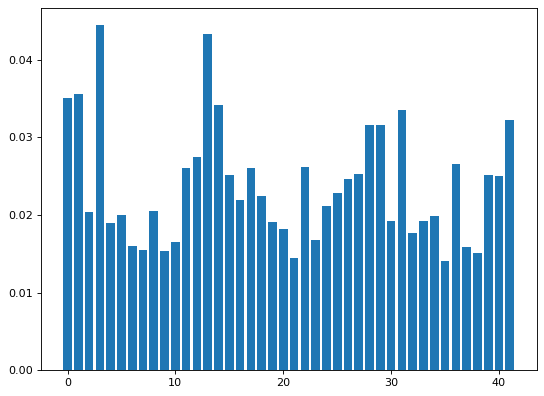

In [86]:
classification(X_train, y_train, X_val, y_val, RandomForestClassifier())

Classification Report - Validation:  
               precision    recall  f1-score   support

         0.0       0.06      0.05      0.06       132
         1.0       0.00      0.00      0.00        73
         3.0       0.00      0.00      0.00        59
         5.0       0.05      0.04      0.05       162
         6.0       0.00      0.00      0.00        41
         7.0       0.33      0.21      0.26        14
         8.0       0.09      0.15      0.11       108
         9.0       0.00      0.00      0.00        49
        10.0       0.25      0.01      0.02        77
        11.0       0.00      0.00      0.00       120
        12.0       0.62      0.67      0.64        12
        13.0       0.23      0.18      0.20       147
        14.0       0.00      0.00      0.00        53
        15.0       0.01      0.01      0.01       141
        16.0       0.81      1.00      0.90        13
        17.0       0.00      0.00      0.00        85
        18.0       0.04      0.11      0.0

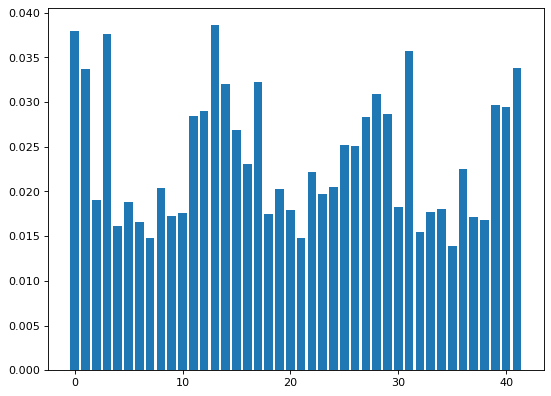

In [87]:
classification(X_train, y_train, X_val, y_val, ExtraTreesClassifier())